In [82]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re

from nltk.corpus import gutenberg, stopwords
from collections import Counter

from tqdm import tqdm

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import ensemble
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfVectorizer


# Project Gutenberg (Hobbes and Locke):

Hobbes' Leviathan:
http://www.gutenberg.org/ebooks/3207.txt.utf-8

Locke's Second Treatise of Government:
http://www.gutenberg.org/ebooks/7370.txt.utf-8

Locke's An Essay Concerning Humane Understanding, Volume I:
http://www.gutenberg.org/ebooks/10615.txt.utf-8

# Data cleaning / processing / language parsing

In [2]:
# Leviathan
filename1 = 'pg3207.txt'

with open(filename1, encoding='latin-1') as file_object1:
    hobbes_leviathan_raw = file_object1.read()

In [3]:
"""hobbes_leviathan_raw"""

'hobbes_leviathan_raw'

In [4]:
startchunk1 = 'ï»¿The Project Gutenberg EBook of Leviathan, by Thomas Hobbes\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Leviathan\n\nAuthor: Thomas Hobbes\n\nRelease Date: May, 2002  [EBook #3207]\nPosting Date: October 11, 2009 [EBook #3207]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK LEVIATHAN ***\n\n\n\n\nProduced by Edward White\n\n\n\n\n\n\n\n\n'

In [5]:
endchunk1 = '\n\n\n\n\n\n\n\n\nEnd of the Project Gutenberg EBook of Leviathan, by Thomas Hobbes\n\n*** END OF THIS PROJECT GUTENBERG EBOOK LEVIATHAN ***\n\n***** This file should be named 3207.txt or 3207.zip *****\nThis and all associated files of various formats will be found in:\n        http://www.gutenberg.org/3/2/0/3207/\n\nProduced by Edward White\n\nUpdated editions will replace the previous one--the old editions\nwill be renamed.\n\nCreating the works from public domain print editions means that no\none owns a United States copyright in these works, so the Foundation\n(and you!) can copy and distribute it in the United States without\npermission and without paying copyright royalties.  Special rules,\nset forth in the General Terms of Use part of this license, apply to\ncopying and distributing Project Gutenberg-tm electronic works to\nprotect the PROJECT GUTENBERG-tm concept and trademark.  Project\nGutenberg is a registered trademark, and may not be used if you\ncharge for the eBooks, unless you receive specific permission.  If you\ndo not charge anything for copies of this eBook, complying with the\nrules is very easy.  You may use this eBook for nearly any purpose\nsuch as creation of derivative works, reports, performances and\nresearch.  They may be modified and printed and given away--you may do\npractically ANYTHING with public domain eBooks.  Redistribution is\nsubject to the trademark license, especially commercial\nredistribution.\n\n\n\n*** START: FULL LICENSE ***\n\nTHE FULL PROJECT GUTENBERG LICENSE\nPLEASE READ THIS BEFORE YOU DISTRIBUTE OR USE THIS WORK\n\nTo protect the Project Gutenberg-tm mission of promoting the free\ndistribution of electronic works, by using or distributing this work\n(or any other work associated in any way with the phrase "Project\nGutenberg"), you agree to comply with all the terms of the Full Project\nGutenberg-tm License (available with this file or online at\nhttp://gutenberg.org/license).\n\n\nSection 1.  General Terms of Use and Redistributing Project Gutenberg-tm\nelectronic works\n\n1.A.  By reading or using any part of this Project Gutenberg-tm\nelectronic work, you indicate that you have read, understand, agree to\nand accept all the terms of this license and intellectual property\n(trademark/copyright) agreement.  If you do not agree to abide by all\nthe terms of this agreement, you must cease using and return or destroy\nall copies of Project Gutenberg-tm electronic works in your possession.\nIf you paid a fee for obtaining a copy of or access to a Project\nGutenberg-tm electronic work and you do not agree to be bound by the\nterms of this agreement, you may obtain a refund from the person or\nentity to whom you paid the fee as set forth in paragraph 1.E.8.\n\n1.B.  "Project Gutenberg" is a registered trademark.  It may only be\nused on or associated in any way with an electronic work by people who\nagree to be bound by the terms of this agreement.  There are a few\nthings that you can do with most Project Gutenberg-tm electronic works\neven without complying with the full terms of this agreement.  See\nparagraph 1.C below.  There are a lot of things you can do with Project\nGutenberg-tm electronic works if you follow the terms of this agreement\nand help preserve free future access to Project Gutenberg-tm electronic\nworks.  See paragraph 1.E below.\n\n1.C.  The Project Gutenberg Literary Archive Foundation ("the Foundation"\nor PGLAF), owns a compilation copyright in the collection of Project\nGutenberg-tm electronic works.  Nearly all the individual works in the\ncollection are in the public domain in the United States.  If an\nindividual work is in the public domain in the United States and you are\nlocated in the United States, we do not claim a right to prevent you from\ncopying, distributing, performing, displaying or creating derivative\nworks based on the work as long as all references to Project Gutenberg\nare removed.  Of course, we hope that you will support the Project\nGutenberg-tm mission of promoting free access to electronic works by\nfreely sharing Project Gutenberg-tm works in compliance with the terms of\nthis agreement for keeping the Project Gutenberg-tm name associated with\nthe work.  You can easily comply with the terms of this agreement by\nkeeping this work in the same format with its attached full Project\nGutenberg-tm License when you share it without charge with others.\n\n1.D.  The copyright laws of the place where you are located also govern\nwhat you can do with this work.  Copyright laws in most countries are in\na constant state of change.  If you are outside the United States, check\nthe laws of your country in addition to the terms of this agreement\nbefore downloading, copying, displaying, performing, distributing or\ncreating derivative works based on this work or any other Project\nGutenberg-tm work.  The Foundation makes no representations concerning\nthe copyright status of any work in any country outside the United\nStates.\n\n1.E.  Unless you have removed all references to Project Gutenberg:\n\n1.E.1.  The following sentence, with active links to, or other immediate\naccess to, the full Project Gutenberg-tm License must appear prominently\nwhenever any copy of a Project Gutenberg-tm work (any work on which the\nphrase "Project Gutenberg" appears, or with which the phrase "Project\nGutenberg" is associated) is accessed, displayed, performed, viewed,\ncopied or distributed:\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n1.E.2.  If an individual Project Gutenberg-tm electronic work is derived\nfrom the public domain (does not contain a notice indicating that it is\nposted with permission of the copyright holder), the work can be copied\nand distributed to anyone in the United States without paying any fees\nor charges.  If you are redistributing or providing access to a work\nwith the phrase "Project Gutenberg" associated with or appearing on the\nwork, you must comply either with the requirements of paragraphs 1.E.1\nthrough 1.E.7 or obtain permission for the use of the work and the\nProject Gutenberg-tm trademark as set forth in paragraphs 1.E.8 or\n1.E.9.\n\n1.E.3.  If an individual Project Gutenberg-tm electronic work is posted\nwith the permission of the copyright holder, your use and distribution\nmust comply with both paragraphs 1.E.1 through 1.E.7 and any additional\nterms imposed by the copyright holder.  Additional terms will be linked\nto the Project Gutenberg-tm License for all works posted with the\npermission of the copyright holder found at the beginning of this work.\n\n1.E.4.  Do not unlink or detach or remove the full Project Gutenberg-tm\nLicense terms from this work, or any files containing a part of this\nwork or any other work associated with Project Gutenberg-tm.\n\n1.E.5.  Do not copy, display, perform, distribute or redistribute this\nelectronic work, or any part of this electronic work, without\nprominently displaying the sentence set forth in paragraph 1.E.1 with\nactive links or immediate access to the full terms of the Project\nGutenberg-tm License.\n\n1.E.6.  You may convert to and distribute this work in any binary,\ncompressed, marked up, nonproprietary or proprietary form, including any\nword processing or hypertext form.  However, if you provide access to or\ndistribute copies of a Project Gutenberg-tm work in a format other than\n"Plain Vanilla ASCII" or other format used in the official version\nposted on the official Project Gutenberg-tm web site (www.gutenberg.org),\nyou must, at no additional cost, fee or expense to the user, provide a\ncopy, a means of exporting a copy, or a means of obtaining a copy upon\nrequest, of the work in its original "Plain Vanilla ASCII" or other\nform.  Any alternate format must include the full Project Gutenberg-tm\nLicense as specified in paragraph 1.E.1.\n\n1.E.7.  Do not charge a fee for access to, viewing, displaying,\nperforming, copying or distributing any Project Gutenberg-tm works\nunless you comply with paragraph 1.E.8 or 1.E.9.\n\n1.E.8.  You may charge a reasonable fee for copies of or providing\naccess to or distributing Project Gutenberg-tm electronic works provided\nthat\n\n- You pay a royalty fee of 20% of the gross profits you derive from\n     the use of Project Gutenberg-tm works calculated using the method\n     you already use to calculate your applicable taxes.  The fee is\n     owed to the owner of the Project Gutenberg-tm trademark, but he\n     has agreed to donate royalties under this paragraph to the\n     Project Gutenberg Literary Archive Foundation.  Royalty payments\n     must be paid within 60 days following each date on which you\n     prepare (or are legally required to prepare) your periodic tax\n     returns.  Royalty payments should be clearly marked as such and\n     sent to the Project Gutenberg Literary Archive Foundation at the\n     address specified in Section 4, "Information about donations to\n     the Project Gutenberg Literary Archive Foundation."\n\n- You provide a full refund of any money paid by a user who notifies\n     you in writing (or by e-mail) within 30 days of receipt that s/he\n     does not agree to the terms of the full Project Gutenberg-tm\n     License.  You must require such a user to return or\n     destroy all copies of the works possessed in a physical medium\n     and discontinue all use of and all access to other copies of\n     Project Gutenberg-tm works.\n\n- You provide, in accordance with paragraph 1.F.3, a full refund of any\n     money paid for a work or a replacement copy, if a defect in the\n     electronic work is discovered and reported to you within 90 days\n     of receipt of the work.\n\n- You comply with all other terms of this agreement for free\n     distribution of Project Gutenberg-tm works.\n\n1.E.9.  If you wish to charge a fee or distribute a Project Gutenberg-tm\nelectronic work or group of works on different terms than are set\nforth in this agreement, you must obtain permission in writing from\nboth the Project Gutenberg Literary Archive Foundation and Michael\nHart, the owner of the Project Gutenberg-tm trademark.  Contact the\nFoundation as set forth in Section 3 below.\n\n1.F.\n\n1.F.1.  Project Gutenberg volunteers and employees expend considerable\neffort to identify, do copyright research on, transcribe and proofread\npublic domain works in creating the Project Gutenberg-tm\ncollection.  Despite these efforts, Project Gutenberg-tm electronic\nworks, and the medium on which they may be stored, may contain\n"Defects," such as, but not limited to, incomplete, inaccurate or\ncorrupt data, transcription errors, a copyright or other intellectual\nproperty infringement, a defective or damaged disk or other medium, a\ncomputer virus, or computer codes that damage or cannot be read by\nyour equipment.\n\n1.F.2.  LIMITED WARRANTY, DISCLAIMER OF DAMAGES - Except for the "Right\nof Replacement or Refund" described in paragraph 1.F.3, the Project\nGutenberg Literary Archive Foundation, the owner of the Project\nGutenberg-tm trademark, and any other party distributing a Project\nGutenberg-tm electronic work under this agreement, disclaim all\nliability to you for damages, costs and expenses, including legal\nfees.  YOU AGREE THAT YOU HAVE NO REMEDIES FOR NEGLIGENCE, STRICT\nLIABILITY, BREACH OF WARRANTY OR BREACH OF CONTRACT EXCEPT THOSE\nPROVIDED IN PARAGRAPH F3.  YOU AGREE THAT THE FOUNDATION, THE\nTRADEMARK OWNER, AND ANY DISTRIBUTOR UNDER THIS AGREEMENT WILL NOT BE\nLIABLE TO YOU FOR ACTUAL, DIRECT, INDIRECT, CONSEQUENTIAL, PUNITIVE OR\nINCIDENTAL DAMAGES EVEN IF YOU GIVE NOTICE OF THE POSSIBILITY OF SUCH\nDAMAGE.\n\n1.F.3.  LIMITED RIGHT OF REPLACEMENT OR REFUND - If you discover a\ndefect in this electronic work within 90 days of receiving it, you can\nreceive a refund of the money (if any) you paid for it by sending a\nwritten explanation to the person you received the work from.  If you\nreceived the work on a physical medium, you must return the medium with\nyour written explanation.  The person or entity that provided you with\nthe defective work may elect to provide a replacement copy in lieu of a\nrefund.  If you received the work electronically, the person or entity\nproviding it to you may choose to give you a second opportunity to\nreceive the work electronically in lieu of a refund.  If the second copy\nis also defective, you may demand a refund in writing without further\nopportunities to fix the problem.\n\n1.F.4.  Except for the limited right of replacement or refund set forth\nin paragraph 1.F.3, this work is provided to you \'AS-IS\' WITH NO OTHER\nWARRANTIES OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO\nWARRANTIES OF MERCHANTIBILITY OR FITNESS FOR ANY PURPOSE.\n\n1.F.5.  Some states do not allow disclaimers of certain implied\nwarranties or the exclusion or limitation of certain types of damages.\nIf any disclaimer or limitation set forth in this agreement violates the\nlaw of the state applicable to this agreement, the agreement shall be\ninterpreted to make the maximum disclaimer or limitation permitted by\nthe applicable state law.  The invalidity or unenforceability of any\nprovision of this agreement shall not void the remaining provisions.\n\n1.F.6.  INDEMNITY - You agree to indemnify and hold the Foundation, the\ntrademark owner, any agent or employee of the Foundation, anyone\nproviding copies of Project Gutenberg-tm electronic works in accordance\nwith this agreement, and any volunteers associated with the production,\npromotion and distribution of Project Gutenberg-tm electronic works,\nharmless from all liability, costs and expenses, including legal fees,\nthat arise directly or indirectly from any of the following which you do\nor cause to occur: (a) distribution of this or any Project Gutenberg-tm\nwork, (b) alteration, modification, or additions or deletions to any\nProject Gutenberg-tm work, and (c) any Defect you cause.\n\n\nSection  2.  Information about the Mission of Project Gutenberg-tm\n\nProject Gutenberg-tm is synonymous with the free distribution of\nelectronic works in formats readable by the widest variety of computers\nincluding obsolete, old, middle-aged and new computers.  It exists\nbecause of the efforts of hundreds of volunteers and donations from\npeople in all walks of life.\n\nVolunteers and financial support to provide volunteers with the\nassistance they need, are critical to reaching Project Gutenberg-tm\'s\ngoals and ensuring that the Project Gutenberg-tm collection will\nremain freely available for generations to come.  In 2001, the Project\nGutenberg Literary Archive Foundation was created to provide a secure\nand permanent future for Project Gutenberg-tm and future generations.\nTo learn more about the Project Gutenberg Literary Archive Foundation\nand how your efforts and donations can help, see Sections 3 and 4\nand the Foundation web page at http://www.pglaf.org.\n\n\nSection 3.  Information about the Project Gutenberg Literary Archive\nFoundation\n\nThe Project Gutenberg Literary Archive Foundation is a non profit\n501(c)(3) educational corporation organized under the laws of the\nstate of Mississippi and granted tax exempt status by the Internal\nRevenue Service.  The Foundation\'s EIN or federal tax identification\nnumber is 64-6221541.  Its 501(c)(3) letter is posted at\nhttp://pglaf.org/fundraising.  Contributions to the Project Gutenberg\nLiterary Archive Foundation are tax deductible to the full extent\npermitted by U.S. federal laws and your state\'s laws.\n\nThe Foundation\'s principal office is located at 4557 Melan Dr. S.\nFairbanks, AK, 99712., but its volunteers and employees are scattered\nthroughout numerous locations.  Its business office is located at\n809 North 1500 West, Salt Lake City, UT 84116, (801) 596-1887, email\nbusiness@pglaf.org.  Email contact links and up to date contact\ninformation can be found at the Foundation\'s web site and official\npage at http://pglaf.org\n\nFor additional contact information:\n     Dr. Gregory B. Newby\n     Chief Executive and Director\n     gbnewby@pglaf.org\n\n\nSection 4.  Information about Donations to the Project Gutenberg\nLiterary Archive Foundation\n\nProject Gutenberg-tm depends upon and cannot survive without wide\nspread public support and donations to carry out its mission of\nincreasing the number of public domain and licensed works that can be\nfreely distributed in machine readable form accessible by the widest\narray of equipment including outdated equipment.  Many small donations\n($1 to $5,000) are particularly important to maintaining tax exempt\nstatus with the IRS.\n\nThe Foundation is committed to complying with the laws regulating\ncharities and charitable donations in all 50 states of the United\nStates.  Compliance requirements are not uniform and it takes a\nconsiderable effort, much paperwork and many fees to meet and keep up\nwith these requirements.  We do not solicit donations in locations\nwhere we have not received written confirmation of compliance.  To\nSEND DONATIONS or determine the status of compliance for any\nparticular state visit http://pglaf.org\n\nWhile we cannot and do not solicit contributions from states where we\nhave not met the solicitation requirements, we know of no prohibition\nagainst accepting unsolicited donations from donors in such states who\napproach us with offers to donate.\n\nInternational donations are gratefully accepted, but we cannot make\nany statements concerning tax treatment of donations received from\noutside the United States.  U.S. laws alone swamp our small staff.\n\nPlease check the Project Gutenberg Web pages for current donation\nmethods and addresses.  Donations are accepted in a number of other\nways including checks, online payments and credit card donations.\nTo donate, please visit: http://pglaf.org/donate\n\n\nSection 5.  General Information About Project Gutenberg-tm electronic\nworks.\n\nProfessor Michael S. Hart is the originator of the Project Gutenberg-tm\nconcept of a library of electronic works that could be freely shared\nwith anyone.  For thirty years, he produced and distributed Project\nGutenberg-tm eBooks with only a loose network of volunteer support.\n\n\nProject Gutenberg-tm eBooks are often created from several printed\neditions, all of which are confirmed as Public Domain in the U.S.\nunless a copyright notice is included.  Thus, we do not necessarily\nkeep eBooks in compliance with any particular paper edition.\n\n\nMost people start at our Web site which has the main PG search facility:\n\n     http://www.gutenberg.org\n\nThis Web site includes information about Project Gutenberg-tm,\nincluding how to make donations to the Project Gutenberg Literary\nArchive Foundation, how to help produce our new eBooks, and how to\nsubscribe to our email newsletter to hear about new eBooks.\n'

In [6]:
len(hobbes_leviathan_raw)

1231787

In [7]:
len(endchunk1)

18756

In [8]:
len(hobbes_leviathan_raw) - len(endchunk1)

1213031

In [9]:
len(startchunk1)

553

In [10]:
hobbes_trimmed = hobbes_leviathan_raw[553:1213031]

In [11]:
"""hobbes_trimmed"""

'hobbes_trimmed'

In [12]:
filename2 = 'pg7370.txt'

with open(filename2, encoding='latin-1') as file_object2:
    locke_treatise2_raw = file_object2.read()

In [13]:
startchunk2 = 'ï»¿The Project Gutenberg EBook of Second Treatise of Government, by John Locke\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Second Treatise of Government\n\nAuthor: John Locke\n\nPosting Date: July 28, 2010 [EBook #7370]\nRelease Date: January, 2005\n[Last updated: September 5, 2017]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK SECOND TREATISE OF GOVERNMENT ***\n\n\n\n\nProduced by Dave Gowan.\n\n\n\n\n\n\n\n\nSECOND TREATISE OF GOVERNMENT by JOHN LOCKE\n\nDigitized by Dave Gowan <dgowan@tfn.net>. John Locke\'s "Second Treatise of Government"\nwas published in 1690. The complete unabridged text has been republished\nseveral times in edited commentaries. This text is recovered entire from\nthe paperback book, "John Locke Second Treatise of Government", Edited,\nwith an Introduction, By C.B. McPherson, Hackett Publishing Company,\nIndianapolis and Cambridge, 1980. None of the McPherson edition is\nincluded in the Etext below; only the original words contained in the\n1690 Locke text is included. The 1690 edition text is free of copyright.\n\n       *       *       *       *       *\n\n\n'

In [14]:
len(startchunk2)

1299

In [15]:
endchunk2 = '\n\n\n\n\n\n\n\nEnd of Project Gutenberg\'s Second Treatise of Government, by John Locke\n\n*** END OF THIS PROJECT GUTENBERG EBOOK SECOND TREATISE OF GOVERNMENT ***\n\n***** This file should be named 7370.txt or 7370.zip *****\nThis and all associated files of various formats will be found in:\n        http://www.gutenberg.org/7/3/7/7370/\n\nProduced by Dave Gowan.\n\nUpdated editions will replace the previous one--the old editions\nwill be renamed.\n\nCreating the works from public domain print editions means that no\none owns a United States copyright in these works, so the Foundation\n(and you!) can copy and distribute it in the United States without\npermission and without paying copyright royalties.  Special rules,\nset forth in the General Terms of Use part of this license, apply to\ncopying and distributing Project Gutenberg-tm electronic works to\nprotect the PROJECT GUTENBERG-tm concept and trademark.  Project\nGutenberg is a registered trademark, and may not be used if you\ncharge for the eBooks, unless you receive specific permission.  If you\ndo not charge anything for copies of this eBook, complying with the\nrules is very easy.  You may use this eBook for nearly any purpose\nsuch as creation of derivative works, reports, performances and\nresearch.  They may be modified and printed and given away--you may do\npractically ANYTHING with public domain eBooks.  Redistribution is\nsubject to the trademark license, especially commercial\nredistribution.\n\n\n\n*** START: FULL LICENSE ***\n\nTHE FULL PROJECT GUTENBERG LICENSE\nPLEASE READ THIS BEFORE YOU DISTRIBUTE OR USE THIS WORK\n\nTo protect the Project Gutenberg-tm mission of promoting the free\ndistribution of electronic works, by using or distributing this work\n(or any other work associated in any way with the phrase "Project\nGutenberg"), you agree to comply with all the terms of the Full Project\nGutenberg-tm License (available with this file or online at\nhttp://gutenberg.org/license).\n\n\nSection 1.  General Terms of Use and Redistributing Project Gutenberg-tm\nelectronic works\n\n1.A.  By reading or using any part of this Project Gutenberg-tm\nelectronic work, you indicate that you have read, understand, agree to\nand accept all the terms of this license and intellectual property\n(trademark/copyright) agreement.  If you do not agree to abide by all\nthe terms of this agreement, you must cease using and return or destroy\nall copies of Project Gutenberg-tm electronic works in your possession.\nIf you paid a fee for obtaining a copy of or access to a Project\nGutenberg-tm electronic work and you do not agree to be bound by the\nterms of this agreement, you may obtain a refund from the person or\nentity to whom you paid the fee as set forth in paragraph 1.E.8.\n\n1.B.  "Project Gutenberg" is a registered trademark.  It may only be\nused on or associated in any way with an electronic work by people who\nagree to be bound by the terms of this agreement.  There are a few\nthings that you can do with most Project Gutenberg-tm electronic works\neven without complying with the full terms of this agreement.  See\nparagraph 1.C below.  There are a lot of things you can do with Project\nGutenberg-tm electronic works if you follow the terms of this agreement\nand help preserve free future access to Project Gutenberg-tm electronic\nworks.  See paragraph 1.E below.\n\n1.C.  The Project Gutenberg Literary Archive Foundation ("the Foundation"\nor PGLAF), owns a compilation copyright in the collection of Project\nGutenberg-tm electronic works.  Nearly all the individual works in the\ncollection are in the public domain in the United States.  If an\nindividual work is in the public domain in the United States and you are\nlocated in the United States, we do not claim a right to prevent you from\ncopying, distributing, performing, displaying or creating derivative\nworks based on the work as long as all references to Project Gutenberg\nare removed.  Of course, we hope that you will support the Project\nGutenberg-tm mission of promoting free access to electronic works by\nfreely sharing Project Gutenberg-tm works in compliance with the terms of\nthis agreement for keeping the Project Gutenberg-tm name associated with\nthe work.  You can easily comply with the terms of this agreement by\nkeeping this work in the same format with its attached full Project\nGutenberg-tm License when you share it without charge with others.\n\n1.D.  The copyright laws of the place where you are located also govern\nwhat you can do with this work.  Copyright laws in most countries are in\na constant state of change.  If you are outside the United States, check\nthe laws of your country in addition to the terms of this agreement\nbefore downloading, copying, displaying, performing, distributing or\ncreating derivative works based on this work or any other Project\nGutenberg-tm work.  The Foundation makes no representations concerning\nthe copyright status of any work in any country outside the United\nStates.\n\n1.E.  Unless you have removed all references to Project Gutenberg:\n\n1.E.1.  The following sentence, with active links to, or other immediate\naccess to, the full Project Gutenberg-tm License must appear prominently\nwhenever any copy of a Project Gutenberg-tm work (any work on which the\nphrase "Project Gutenberg" appears, or with which the phrase "Project\nGutenberg" is associated) is accessed, displayed, performed, viewed,\ncopied or distributed:\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n1.E.2.  If an individual Project Gutenberg-tm electronic work is derived\nfrom the public domain (does not contain a notice indicating that it is\nposted with permission of the copyright holder), the work can be copied\nand distributed to anyone in the United States without paying any fees\nor charges.  If you are redistributing or providing access to a work\nwith the phrase "Project Gutenberg" associated with or appearing on the\nwork, you must comply either with the requirements of paragraphs 1.E.1\nthrough 1.E.7 or obtain permission for the use of the work and the\nProject Gutenberg-tm trademark as set forth in paragraphs 1.E.8 or\n1.E.9.\n\n1.E.3.  If an individual Project Gutenberg-tm electronic work is posted\nwith the permission of the copyright holder, your use and distribution\nmust comply with both paragraphs 1.E.1 through 1.E.7 and any additional\nterms imposed by the copyright holder.  Additional terms will be linked\nto the Project Gutenberg-tm License for all works posted with the\npermission of the copyright holder found at the beginning of this work.\n\n1.E.4.  Do not unlink or detach or remove the full Project Gutenberg-tm\nLicense terms from this work, or any files containing a part of this\nwork or any other work associated with Project Gutenberg-tm.\n\n1.E.5.  Do not copy, display, perform, distribute or redistribute this\nelectronic work, or any part of this electronic work, without\nprominently displaying the sentence set forth in paragraph 1.E.1 with\nactive links or immediate access to the full terms of the Project\nGutenberg-tm License.\n\n1.E.6.  You may convert to and distribute this work in any binary,\ncompressed, marked up, nonproprietary or proprietary form, including any\nword processing or hypertext form.  However, if you provide access to or\ndistribute copies of a Project Gutenberg-tm work in a format other than\n"Plain Vanilla ASCII" or other format used in the official version\nposted on the official Project Gutenberg-tm web site (www.gutenberg.org),\nyou must, at no additional cost, fee or expense to the user, provide a\ncopy, a means of exporting a copy, or a means of obtaining a copy upon\nrequest, of the work in its original "Plain Vanilla ASCII" or other\nform.  Any alternate format must include the full Project Gutenberg-tm\nLicense as specified in paragraph 1.E.1.\n\n1.E.7.  Do not charge a fee for access to, viewing, displaying,\nperforming, copying or distributing any Project Gutenberg-tm works\nunless you comply with paragraph 1.E.8 or 1.E.9.\n\n1.E.8.  You may charge a reasonable fee for copies of or providing\naccess to or distributing Project Gutenberg-tm electronic works provided\nthat\n\n- You pay a royalty fee of 20% of the gross profits you derive from\n     the use of Project Gutenberg-tm works calculated using the method\n     you already use to calculate your applicable taxes.  The fee is\n     owed to the owner of the Project Gutenberg-tm trademark, but he\n     has agreed to donate royalties under this paragraph to the\n     Project Gutenberg Literary Archive Foundation.  Royalty payments\n     must be paid within 60 days following each date on which you\n     prepare (or are legally required to prepare) your periodic tax\n     returns.  Royalty payments should be clearly marked as such and\n     sent to the Project Gutenberg Literary Archive Foundation at the\n     address specified in Section 4, "Information about donations to\n     the Project Gutenberg Literary Archive Foundation."\n\n- You provide a full refund of any money paid by a user who notifies\n     you in writing (or by e-mail) within 30 days of receipt that s/he\n     does not agree to the terms of the full Project Gutenberg-tm\n     License.  You must require such a user to return or\n     destroy all copies of the works possessed in a physical medium\n     and discontinue all use of and all access to other copies of\n     Project Gutenberg-tm works.\n\n- You provide, in accordance with paragraph 1.F.3, a full refund of any\n     money paid for a work or a replacement copy, if a defect in the\n     electronic work is discovered and reported to you within 90 days\n     of receipt of the work.\n\n- You comply with all other terms of this agreement for free\n     distribution of Project Gutenberg-tm works.\n\n1.E.9.  If you wish to charge a fee or distribute a Project Gutenberg-tm\nelectronic work or group of works on different terms than are set\nforth in this agreement, you must obtain permission in writing from\nboth the Project Gutenberg Literary Archive Foundation and Michael\nHart, the owner of the Project Gutenberg-tm trademark.  Contact the\nFoundation as set forth in Section 3 below.\n\n1.F.\n\n1.F.1.  Project Gutenberg volunteers and employees expend considerable\neffort to identify, do copyright research on, transcribe and proofread\npublic domain works in creating the Project Gutenberg-tm\ncollection.  Despite these efforts, Project Gutenberg-tm electronic\nworks, and the medium on which they may be stored, may contain\n"Defects," such as, but not limited to, incomplete, inaccurate or\ncorrupt data, transcription errors, a copyright or other intellectual\nproperty infringement, a defective or damaged disk or other medium, a\ncomputer virus, or computer codes that damage or cannot be read by\nyour equipment.\n\n1.F.2.  LIMITED WARRANTY, DISCLAIMER OF DAMAGES - Except for the "Right\nof Replacement or Refund" described in paragraph 1.F.3, the Project\nGutenberg Literary Archive Foundation, the owner of the Project\nGutenberg-tm trademark, and any other party distributing a Project\nGutenberg-tm electronic work under this agreement, disclaim all\nliability to you for damages, costs and expenses, including legal\nfees.  YOU AGREE THAT YOU HAVE NO REMEDIES FOR NEGLIGENCE, STRICT\nLIABILITY, BREACH OF WARRANTY OR BREACH OF CONTRACT EXCEPT THOSE\nPROVIDED IN PARAGRAPH F3.  YOU AGREE THAT THE FOUNDATION, THE\nTRADEMARK OWNER, AND ANY DISTRIBUTOR UNDER THIS AGREEMENT WILL NOT BE\nLIABLE TO YOU FOR ACTUAL, DIRECT, INDIRECT, CONSEQUENTIAL, PUNITIVE OR\nINCIDENTAL DAMAGES EVEN IF YOU GIVE NOTICE OF THE POSSIBILITY OF SUCH\nDAMAGE.\n\n1.F.3.  LIMITED RIGHT OF REPLACEMENT OR REFUND - If you discover a\ndefect in this electronic work within 90 days of receiving it, you can\nreceive a refund of the money (if any) you paid for it by sending a\nwritten explanation to the person you received the work from.  If you\nreceived the work on a physical medium, you must return the medium with\nyour written explanation.  The person or entity that provided you with\nthe defective work may elect to provide a replacement copy in lieu of a\nrefund.  If you received the work electronically, the person or entity\nproviding it to you may choose to give you a second opportunity to\nreceive the work electronically in lieu of a refund.  If the second copy\nis also defective, you may demand a refund in writing without further\nopportunities to fix the problem.\n\n1.F.4.  Except for the limited right of replacement or refund set forth\nin paragraph 1.F.3, this work is provided to you \'AS-IS\' WITH NO OTHER\nWARRANTIES OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO\nWARRANTIES OF MERCHANTIBILITY OR FITNESS FOR ANY PURPOSE.\n\n1.F.5.  Some states do not allow disclaimers of certain implied\nwarranties or the exclusion or limitation of certain types of damages.\nIf any disclaimer or limitation set forth in this agreement violates the\nlaw of the state applicable to this agreement, the agreement shall be\ninterpreted to make the maximum disclaimer or limitation permitted by\nthe applicable state law.  The invalidity or unenforceability of any\nprovision of this agreement shall not void the remaining provisions.\n\n1.F.6.  INDEMNITY - You agree to indemnify and hold the Foundation, the\ntrademark owner, any agent or employee of the Foundation, anyone\nproviding copies of Project Gutenberg-tm electronic works in accordance\nwith this agreement, and any volunteers associated with the production,\npromotion and distribution of Project Gutenberg-tm electronic works,\nharmless from all liability, costs and expenses, including legal fees,\nthat arise directly or indirectly from any of the following which you do\nor cause to occur: (a) distribution of this or any Project Gutenberg-tm\nwork, (b) alteration, modification, or additions or deletions to any\nProject Gutenberg-tm work, and (c) any Defect you cause.\n\n\nSection  2.  Information about the Mission of Project Gutenberg-tm\n\nProject Gutenberg-tm is synonymous with the free distribution of\nelectronic works in formats readable by the widest variety of computers\nincluding obsolete, old, middle-aged and new computers.  It exists\nbecause of the efforts of hundreds of volunteers and donations from\npeople in all walks of life.\n\nVolunteers and financial support to provide volunteers with the\nassistance they need, are critical to reaching Project Gutenberg-tm\'s\ngoals and ensuring that the Project Gutenberg-tm collection will\nremain freely available for generations to come.  In 2001, the Project\nGutenberg Literary Archive Foundation was created to provide a secure\nand permanent future for Project Gutenberg-tm and future generations.\nTo learn more about the Project Gutenberg Literary Archive Foundation\nand how your efforts and donations can help, see Sections 3 and 4\nand the Foundation web page at http://www.pglaf.org.\n\n\nSection 3.  Information about the Project Gutenberg Literary Archive\nFoundation\n\nThe Project Gutenberg Literary Archive Foundation is a non profit\n501(c)(3) educational corporation organized under the laws of the\nstate of Mississippi and granted tax exempt status by the Internal\nRevenue Service.  The Foundation\'s EIN or federal tax identification\nnumber is 64-6221541.  Its 501(c)(3) letter is posted at\nhttp://pglaf.org/fundraising.  Contributions to the Project Gutenberg\nLiterary Archive Foundation are tax deductible to the full extent\npermitted by U.S. federal laws and your state\'s laws.\n\nThe Foundation\'s principal office is located at 4557 Melan Dr. S.\nFairbanks, AK, 99712., but its volunteers and employees are scattered\nthroughout numerous locations.  Its business office is located at\n809 North 1500 West, Salt Lake City, UT 84116, (801) 596-1887, email\nbusiness@pglaf.org.  Email contact links and up to date contact\ninformation can be found at the Foundation\'s web site and official\npage at http://pglaf.org\n\nFor additional contact information:\n     Dr. Gregory B. Newby\n     Chief Executive and Director\n     gbnewby@pglaf.org\n\n\nSection 4.  Information about Donations to the Project Gutenberg\nLiterary Archive Foundation\n\nProject Gutenberg-tm depends upon and cannot survive without wide\nspread public support and donations to carry out its mission of\nincreasing the number of public domain and licensed works that can be\nfreely distributed in machine readable form accessible by the widest\narray of equipment including outdated equipment.  Many small donations\n($1 to $5,000) are particularly important to maintaining tax exempt\nstatus with the IRS.\n\nThe Foundation is committed to complying with the laws regulating\ncharities and charitable donations in all 50 states of the United\nStates.  Compliance requirements are not uniform and it takes a\nconsiderable effort, much paperwork and many fees to meet and keep up\nwith these requirements.  We do not solicit donations in locations\nwhere we have not received written confirmation of compliance.  To\nSEND DONATIONS or determine the status of compliance for any\nparticular state visit http://pglaf.org\n\nWhile we cannot and do not solicit contributions from states where we\nhave not met the solicitation requirements, we know of no prohibition\nagainst accepting unsolicited donations from donors in such states who\napproach us with offers to donate.\n\nInternational donations are gratefully accepted, but we cannot make\nany statements concerning tax treatment of donations received from\noutside the United States.  U.S. laws alone swamp our small staff.\n\nPlease check the Project Gutenberg Web pages for current donation\nmethods and addresses.  Donations are accepted in a number of other\nways including checks, online payments and credit card donations.\nTo donate, please visit: http://pglaf.org/donate\n\n\nSection 5.  General Information About Project Gutenberg-tm electronic\nworks.\n\nProfessor Michael S. Hart is the originator of the Project Gutenberg-tm\nconcept of a library of electronic works that could be freely shared\nwith anyone.  For thirty years, he produced and distributed Project\nGutenberg-tm eBooks with only a loose network of volunteer support.\n\n\nProject Gutenberg-tm eBooks are often created from several printed\neditions, all of which are confirmed as Public Domain in the U.S.\nunless a copyright notice is included.  Thus, we do not necessarily\nkeep eBooks in compliance with any particular paper edition.\n\n\nMost people start at our Web site which has the main PG search facility:\n\n     http://www.gutenberg.org\n\nThis Web site includes information about Project Gutenberg-tm,\nincluding how to make donations to the Project Gutenberg Literary\nArchive Foundation, how to help produce our new eBooks, and how to\nsubscribe to our email newsletter to hear about new eBooks.\n'

In [16]:
len(locke_treatise2_raw)

333070

In [17]:
len(endchunk2)

18780

In [18]:
len(locke_treatise2_raw) - len(endchunk2)

314290

In [19]:
locke1_trimmed = locke_treatise2_raw[1299:314290]

In [20]:
"""locke1_trimmed"""

'locke1_trimmed'

In [21]:
filename3 = 'pg10615.txt'

with open(filename3, encoding='latin-1') as file_object3:
    locke_human_raw = file_object3.read()

In [22]:
"""locke_human_raw"""

'locke_human_raw'

In [23]:
startchunk3 = 'ï»¿The Project Gutenberg EBook of An Essay Concerning Humane Understanding,\nVolume I., by John Locke\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.net\n\n\nTitle: An Essay Concerning Humane Understanding, Volume I.\n       MDCXC, Based on the 2nd Edition, Books I. and II. (of 4)\n\nAuthor: John Locke\n\nRelease Date: January 6, 2004 [EBook #10615]\nLast Updated: August 23, 2017\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK HUMANE UNDERSTANDING, V1 ***\n\n\n\n\nProduced by Steve Harris and David Widger\n\n\n\n\n'

In [24]:
len(startchunk3)

714

In [25]:
endchunk3 = '\n\n\n\n\n\n\nEnd of the Project Gutenberg EBook of An Essay Concerning Humane\nUnderstanding, Volume I., by John Locke\n\n*** END OF THIS PROJECT GUTENBERG EBOOK HUMANE UNDERSTANDING ***\n\n***** This file should be named 10615-0.txt or 10616-0.zip *****\nThis and all associated files of various formats will be found in:\n        http://www.gutenberg.org/1/0/6/1/10615/\n\nProduced by Steve Harris and David Widger\n\nUpdated editions will replace the previous one--the old editions will\nbe renamed.\n\nCreating the works from print editions not protected by U.S. copyright\nlaw means that no one owns a United States copyright in these works,\nso the Foundation (and you!) can copy and distribute it in the United\nStates without permission and without paying copyright\nroyalties. Special rules, set forth in the General Terms of Use part\nof this license, apply to copying and distributing Project\nGutenberg-tm electronic works to protect the PROJECT GUTENBERG-tm\nconcept and trademark. Project Gutenberg is a registered trademark,\nand may not be used if you charge for the eBooks, unless you receive\nspecific permission. If you do not charge anything for copies of this\neBook, complying with the rules is very easy. You may use this eBook\nfor nearly any purpose such as creation of derivative works, reports,\nperformances and research. They may be modified and printed and given\naway--you may do practically ANYTHING in the United States with eBooks\nnot protected by U.S. copyright law. Redistribution is subject to the\ntrademark license, especially commercial redistribution.\n\nSTART: FULL LICENSE\n\nTHE FULL PROJECT GUTENBERG LICENSE\nPLEASE READ THIS BEFORE YOU DISTRIBUTE OR USE THIS WORK\n\nTo protect the Project Gutenberg-tm mission of promoting the free\ndistribution of electronic works, by using or distributing this work\n(or any other work associated in any way with the phrase "Project\nGutenberg"), you agree to comply with all the terms of the Full\nProject Gutenberg-tm License available with this file or online at\nwww.gutenberg.org/license.\n\nSection 1. General Terms of Use and Redistributing Project\nGutenberg-tm electronic works\n\n1.A. By reading or using any part of this Project Gutenberg-tm\nelectronic work, you indicate that you have read, understand, agree to\nand accept all the terms of this license and intellectual property\n(trademark/copyright) agreement. If you do not agree to abide by all\nthe terms of this agreement, you must cease using and return or\ndestroy all copies of Project Gutenberg-tm electronic works in your\npossession. If you paid a fee for obtaining a copy of or access to a\nProject Gutenberg-tm electronic work and you do not agree to be bound\nby the terms of this agreement, you may obtain a refund from the\nperson or entity to whom you paid the fee as set forth in paragraph\n1.E.8.\n\n1.B. "Project Gutenberg" is a registered trademark. It may only be\nused on or associated in any way with an electronic work by people who\nagree to be bound by the terms of this agreement. There are a few\nthings that you can do with most Project Gutenberg-tm electronic works\neven without complying with the full terms of this agreement. See\nparagraph 1.C below. There are a lot of things you can do with Project\nGutenberg-tm electronic works if you follow the terms of this\nagreement and help preserve free future access to Project Gutenberg-tm\nelectronic works. See paragraph 1.E below.\n\n1.C. The Project Gutenberg Literary Archive Foundation ("the\nFoundation" or PGLAF), owns a compilation copyright in the collection\nof Project Gutenberg-tm electronic works. Nearly all the individual\nworks in the collection are in the public domain in the United\nStates. If an individual work is unprotected by copyright law in the\nUnited States and you are located in the United States, we do not\nclaim a right to prevent you from copying, distributing, performing,\ndisplaying or creating derivative works based on the work as long as\nall references to Project Gutenberg are removed. Of course, we hope\nthat you will support the Project Gutenberg-tm mission of promoting\nfree access to electronic works by freely sharing Project Gutenberg-tm\nworks in compliance with the terms of this agreement for keeping the\nProject Gutenberg-tm name associated with the work. You can easily\ncomply with the terms of this agreement by keeping this work in the\nsame format with its attached full Project Gutenberg-tm License when\nyou share it without charge with others.\n\n1.D. The copyright laws of the place where you are located also govern\nwhat you can do with this work. Copyright laws in most countries are\nin a constant state of change. If you are outside the United States,\ncheck the laws of your country in addition to the terms of this\nagreement before downloading, copying, displaying, performing,\ndistributing or creating derivative works based on this work or any\nother Project Gutenberg-tm work. The Foundation makes no\nrepresentations concerning the copyright status of any work in any\ncountry outside the United States.\n\n1.E. Unless you have removed all references to Project Gutenberg:\n\n1.E.1. The following sentence, with active links to, or other\nimmediate access to, the full Project Gutenberg-tm License must appear\nprominently whenever any copy of a Project Gutenberg-tm work (any work\non which the phrase "Project Gutenberg" appears, or with which the\nphrase "Project Gutenberg" is associated) is accessed, displayed,\nperformed, viewed, copied or distributed:\n\n  This eBook is for the use of anyone anywhere in the United States and\n  most other parts of the world at no cost and with almost no\n  restrictions whatsoever. You may copy it, give it away or re-use it\n  under the terms of the Project Gutenberg License included with this\n  eBook or online at www.gutenberg.org. If you are not located in the\n  United States, you\'ll have to check the laws of the country where you\n  are located before using this ebook.\n\n1.E.2. If an individual Project Gutenberg-tm electronic work is\nderived from texts not protected by U.S. copyright law (does not\ncontain a notice indicating that it is posted with permission of the\ncopyright holder), the work can be copied and distributed to anyone in\nthe United States without paying any fees or charges. If you are\nredistributing or providing access to a work with the phrase "Project\nGutenberg" associated with or appearing on the work, you must comply\neither with the requirements of paragraphs 1.E.1 through 1.E.7 or\nobtain permission for the use of the work and the Project Gutenberg-tm\ntrademark as set forth in paragraphs 1.E.8 or 1.E.9.\n\n1.E.3. If an individual Project Gutenberg-tm electronic work is posted\nwith the permission of the copyright holder, your use and distribution\nmust comply with both paragraphs 1.E.1 through 1.E.7 and any\nadditional terms imposed by the copyright holder. Additional terms\nwill be linked to the Project Gutenberg-tm License for all works\nposted with the permission of the copyright holder found at the\nbeginning of this work.\n\n1.E.4. Do not unlink or detach or remove the full Project Gutenberg-tm\nLicense terms from this work, or any files containing a part of this\nwork or any other work associated with Project Gutenberg-tm.\n\n1.E.5. Do not copy, display, perform, distribute or redistribute this\nelectronic work, or any part of this electronic work, without\nprominently displaying the sentence set forth in paragraph 1.E.1 with\nactive links or immediate access to the full terms of the Project\nGutenberg-tm License.\n\n1.E.6. You may convert to and distribute this work in any binary,\ncompressed, marked up, nonproprietary or proprietary form, including\nany word processing or hypertext form. However, if you provide access\nto or distribute copies of a Project Gutenberg-tm work in a format\nother than "Plain Vanilla ASCII" or other format used in the official\nversion posted on the official Project Gutenberg-tm web site\n(www.gutenberg.org), you must, at no additional cost, fee or expense\nto the user, provide a copy, a means of exporting a copy, or a means\nof obtaining a copy upon request, of the work in its original "Plain\nVanilla ASCII" or other form. Any alternate format must include the\nfull Project Gutenberg-tm License as specified in paragraph 1.E.1.\n\n1.E.7. Do not charge a fee for access to, viewing, displaying,\nperforming, copying or distributing any Project Gutenberg-tm works\nunless you comply with paragraph 1.E.8 or 1.E.9.\n\n1.E.8. You may charge a reasonable fee for copies of or providing\naccess to or distributing Project Gutenberg-tm electronic works\nprovided that\n\n* You pay a royalty fee of 20% of the gross profits you derive from\n  the use of Project Gutenberg-tm works calculated using the method\n  you already use to calculate your applicable taxes. The fee is owed\n  to the owner of the Project Gutenberg-tm trademark, but he has\n  agreed to donate royalties under this paragraph to the Project\n  Gutenberg Literary Archive Foundation. Royalty payments must be paid\n  within 60 days following each date on which you prepare (or are\n  legally required to prepare) your periodic tax returns. Royalty\n  payments should be clearly marked as such and sent to the Project\n  Gutenberg Literary Archive Foundation at the address specified in\n  Section 4, "Information about donations to the Project Gutenberg\n  Literary Archive Foundation."\n\n* You provide a full refund of any money paid by a user who notifies\n  you in writing (or by e-mail) within 30 days of receipt that s/he\n  does not agree to the terms of the full Project Gutenberg-tm\n  License. You must require such a user to return or destroy all\n  copies of the works possessed in a physical medium and discontinue\n  all use of and all access to other copies of Project Gutenberg-tm\n  works.\n\n* You provide, in accordance with paragraph 1.F.3, a full refund of\n  any money paid for a work or a replacement copy, if a defect in the\n  electronic work is discovered and reported to you within 90 days of\n  receipt of the work.\n\n* You comply with all other terms of this agreement for free\n  distribution of Project Gutenberg-tm works.\n\n1.E.9. If you wish to charge a fee or distribute a Project\nGutenberg-tm electronic work or group of works on different terms than\nare set forth in this agreement, you must obtain permission in writing\nfrom both the Project Gutenberg Literary Archive Foundation and The\nProject Gutenberg Trademark LLC, the owner of the Project Gutenberg-tm\ntrademark. Contact the Foundation as set forth in Section 3 below.\n\n1.F.\n\n1.F.1. Project Gutenberg volunteers and employees expend considerable\neffort to identify, do copyright research on, transcribe and proofread\nworks not protected by U.S. copyright law in creating the Project\nGutenberg-tm collection. Despite these efforts, Project Gutenberg-tm\nelectronic works, and the medium on which they may be stored, may\ncontain "Defects," such as, but not limited to, incomplete, inaccurate\nor corrupt data, transcription errors, a copyright or other\nintellectual property infringement, a defective or damaged disk or\nother medium, a computer virus, or computer codes that damage or\ncannot be read by your equipment.\n\n1.F.2. LIMITED WARRANTY, DISCLAIMER OF DAMAGES - Except for the "Right\nof Replacement or Refund" described in paragraph 1.F.3, the Project\nGutenberg Literary Archive Foundation, the owner of the Project\nGutenberg-tm trademark, and any other party distributing a Project\nGutenberg-tm electronic work under this agreement, disclaim all\nliability to you for damages, costs and expenses, including legal\nfees. YOU AGREE THAT YOU HAVE NO REMEDIES FOR NEGLIGENCE, STRICT\nLIABILITY, BREACH OF WARRANTY OR BREACH OF CONTRACT EXCEPT THOSE\nPROVIDED IN PARAGRAPH 1.F.3. YOU AGREE THAT THE FOUNDATION, THE\nTRADEMARK OWNER, AND ANY DISTRIBUTOR UNDER THIS AGREEMENT WILL NOT BE\nLIABLE TO YOU FOR ACTUAL, DIRECT, INDIRECT, CONSEQUENTIAL, PUNITIVE OR\nINCIDENTAL DAMAGES EVEN IF YOU GIVE NOTICE OF THE POSSIBILITY OF SUCH\nDAMAGE.\n\n1.F.3. LIMITED RIGHT OF REPLACEMENT OR REFUND - If you discover a\ndefect in this electronic work within 90 days of receiving it, you can\nreceive a refund of the money (if any) you paid for it by sending a\nwritten explanation to the person you received the work from. If you\nreceived the work on a physical medium, you must return the medium\nwith your written explanation. The person or entity that provided you\nwith the defective work may elect to provide a replacement copy in\nlieu of a refund. If you received the work electronically, the person\nor entity providing it to you may choose to give you a second\nopportunity to receive the work electronically in lieu of a refund. If\nthe second copy is also defective, you may demand a refund in writing\nwithout further opportunities to fix the problem.\n\n1.F.4. Except for the limited right of replacement or refund set forth\nin paragraph 1.F.3, this work is provided to you \'AS-IS\', WITH NO\nOTHER WARRANTIES OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT\nLIMITED TO WARRANTIES OF MERCHANTABILITY OR FITNESS FOR ANY PURPOSE.\n\n1.F.5. Some states do not allow disclaimers of certain implied\nwarranties or the exclusion or limitation of certain types of\ndamages. If any disclaimer or limitation set forth in this agreement\nviolates the law of the state applicable to this agreement, the\nagreement shall be interpreted to make the maximum disclaimer or\nlimitation permitted by the applicable state law. The invalidity or\nunenforceability of any provision of this agreement shall not void the\nremaining provisions.\n\n1.F.6. INDEMNITY - You agree to indemnify and hold the Foundation, the\ntrademark owner, any agent or employee of the Foundation, anyone\nproviding copies of Project Gutenberg-tm electronic works in\naccordance with this agreement, and any volunteers associated with the\nproduction, promotion and distribution of Project Gutenberg-tm\nelectronic works, harmless from all liability, costs and expenses,\nincluding legal fees, that arise directly or indirectly from any of\nthe following which you do or cause to occur: (a) distribution of this\nor any Project Gutenberg-tm work, (b) alteration, modification, or\nadditions or deletions to any Project Gutenberg-tm work, and (c) any\nDefect you cause.\n\nSection 2. Information about the Mission of Project Gutenberg-tm\n\nProject Gutenberg-tm is synonymous with the free distribution of\nelectronic works in formats readable by the widest variety of\ncomputers including obsolete, old, middle-aged and new computers. It\nexists because of the efforts of hundreds of volunteers and donations\nfrom people in all walks of life.\n\nVolunteers and financial support to provide volunteers with the\nassistance they need are critical to reaching Project Gutenberg-tm\'s\ngoals and ensuring that the Project Gutenberg-tm collection will\nremain freely available for generations to come. In 2001, the Project\nGutenberg Literary Archive Foundation was created to provide a secure\nand permanent future for Project Gutenberg-tm and future\ngenerations. To learn more about the Project Gutenberg Literary\nArchive Foundation and how your efforts and donations can help, see\nSections 3 and 4 and the Foundation information page at\nwww.gutenberg.org Section 3. Information about the Project Gutenberg\nLiterary Archive Foundation\n\nThe Project Gutenberg Literary Archive Foundation is a non profit\n501(c)(3) educational corporation organized under the laws of the\nstate of Mississippi and granted tax exempt status by the Internal\nRevenue Service. The Foundation\'s EIN or federal tax identification\nnumber is 64-6221541. Contributions to the Project Gutenberg Literary\nArchive Foundation are tax deductible to the full extent permitted by\nU.S. federal laws and your state\'s laws.\n\nThe Foundation\'s principal office is in Fairbanks, Alaska, with the\nmailing address: PO Box 750175, Fairbanks, AK 99775, but its\nvolunteers and employees are scattered throughout numerous\nlocations. Its business office is located at 809 North 1500 West, Salt\nLake City, UT 84116, (801) 596-1887. Email contact links and up to\ndate contact information can be found at the Foundation\'s web site and\nofficial page at www.gutenberg.org/contact\n\nFor additional contact information:\n\n    Dr. Gregory B. Newby\n    Chief Executive and Director\n    gbnewby@pglaf.org\n\nSection 4. Information about Donations to the Project Gutenberg\nLiterary Archive Foundation\n\nProject Gutenberg-tm depends upon and cannot survive without wide\nspread public support and donations to carry out its mission of\nincreasing the number of public domain and licensed works that can be\nfreely distributed in machine readable form accessible by the widest\narray of equipment including outdated equipment. Many small donations\n($1 to $5,000) are particularly important to maintaining tax exempt\nstatus with the IRS.\n\nThe Foundation is committed to complying with the laws regulating\ncharities and charitable donations in all 50 states of the United\nStates. Compliance requirements are not uniform and it takes a\nconsiderable effort, much paperwork and many fees to meet and keep up\nwith these requirements. We do not solicit donations in locations\nwhere we have not received written confirmation of compliance. To SEND\nDONATIONS or determine the status of compliance for any particular\nstate visit www.gutenberg.org/donate\n\nWhile we cannot and do not solicit contributions from states where we\nhave not met the solicitation requirements, we know of no prohibition\nagainst accepting unsolicited donations from donors in such states who\napproach us with offers to donate.\n\nInternational donations are gratefully accepted, but we cannot make\nany statements concerning tax treatment of donations received from\noutside the United States. U.S. laws alone swamp our small staff.\n\nPlease check the Project Gutenberg Web pages for current donation\nmethods and addresses. Donations are accepted in a number of other\nways including checks, online payments and credit card donations. To\ndonate, please visit: www.gutenberg.org/donate\n\nSection 5. General Information About Project Gutenberg-tm electronic works.\n\nProfessor Michael S. Hart was the originator of the Project\nGutenberg-tm concept of a library of electronic works that could be\nfreely shared with anyone. For forty years, he produced and\ndistributed Project Gutenberg-tm eBooks with only a loose network of\nvolunteer support.\n\nProject Gutenberg-tm eBooks are often created from several printed\neditions, all of which are confirmed as not protected by copyright in\nthe U.S. unless a copyright notice is included. Thus, we do not\nnecessarily keep eBooks in compliance with any particular paper\nedition.\n\nMost people start at our Web site which has the main PG search\nfacility: www.gutenberg.org\n\nThis Web site includes information about Project Gutenberg-tm,\nincluding how to make donations to the Project Gutenberg Literary\nArchive Foundation, how to help produce our new eBooks, and how to\nsubscribe to our email newsletter to hear about new eBooks.\n'

In [26]:
len(locke_human_raw)

855499

In [27]:
len(endchunk3)

18980

In [28]:
len(locke_human_raw) - len(endchunk3)

836519

In [29]:
locke2_trimmed = locke_human_raw[714:836519]

In [30]:
"""locke2_trimmed"""

'locke2_trimmed'

## Text Cleaning Function:

In [31]:
def text_cleaner(text):
    
    # Remove '--' if there are any instances of it so SpaCy can process the text
    text = re.sub(r'--',' ',text)
    
    # Get rid of headings in square brackets.
    text = re.sub("[\[].*?[\]]", "", text)
    
    # Get rid of chapter titles.
    text = re.sub(r'Chapter \d+','',text)
    
    # Get rid of extra whitespace.
    text = ' '.join(text.split())
    
    return text

In [32]:
hobbes_leviathan_clean = text_cleaner(hobbes_trimmed)

In [33]:
locke_treatise2_clean = text_cleaner(locke1_trimmed)

In [34]:
locke_human_clean = text_cleaner(locke2_trimmed)

In [35]:
nlp = spacy.load('en')

In [36]:
# Hobbes' Leviathan is too long for SpaCy, so it must be split up before processing:

hobbes_clean1 = hobbes_leviathan_clean[0:600000]
hobbes_clean2 = hobbes_leviathan_clean[600000:]
hobbes_doc1 = nlp(hobbes_clean1)
hobbes_doc2 = nlp(hobbes_clean2)

# Locke Treatise

locke_treatise_doc = nlp(locke_treatise2_clean)

# Locke Human Understanding

locke_human_doc = nlp(locke_human_clean)

In [37]:
hobbes_sents1 = [[sent, "Hobbes"] for sent in hobbes_doc1.sents]
hobbes_sents2 = [[sent, "Hobbes"] for sent in hobbes_doc2.sents]
locke_treatise_sents = [[sent, "Locke"] for sent in locke_treatise_doc.sents]
locke_human_sents = [[sent, "Locke"] for sent in locke_human_doc.sents]

# Combine the sentences from the two novels into one data frame.
sentences = pd.DataFrame(hobbes_sents1 + hobbes_sents2 + locke_human_sents + locke_treatise_sents)
sentences.head()

,0,1
0,"(LEVIATHAN, By, Thomas, Hobbes, 1651, LEVIATHA...",Hobbes
1,"(TRANSCRIBER, 'S, NOTES, ON, THE, E, -, TEXT, :)",Hobbes
2,"(This, E, -, text, was, prepared, from, the, P...",Hobbes
3,"(I, have, tried, to, follow, as, closely, as, ...",Hobbes
4,"(Hobbes, used, capitals, and, italics, very, e...",Hobbes


# Create Features:

## Bag of Words Approach:

In [41]:
def bag_of_words(text, n_words=2000):
    
    # Filter out punctuation and stop words:
    allwords = [token.lemma_
               for token in text
               if not token.is_punct
               and not token.is_stop]
    
    # Return the most common words:
    return [item[0] for item in Counter(allwords).most_common(n_words)]

In [42]:
hob_common1 = bag_of_words(hobbes_doc1)
hob_common2 = bag_of_words(hobbes_doc2)
locke_treatise_common = bag_of_words(locke_treatise_doc)
locke_human_common = bag_of_words(locke_human_doc)

In [43]:
len(sentences)

13730

In [44]:
common_words = set(hob_common1 + hob_common2 + locke_human_common + locke_treatise_common)

In [159]:
models = []
scores = []
variances = []

### Bag of Words Function:

In [160]:
def bow_features(sentences, common_words, chunk_number):
    
    chunk_index = chunk_number*1373
    
    #See if file exists
    try:
        pd.read_csv('hobbes_locke_word_counts_{}.csv'.format(chunk_number))
        
        print('Chunk {} already exists.'.format(chunk_number))
        
    except FileNotFoundError:
        
        print('Processing Chunk {}'.format(chunk_number))
        
        bow_df = pd.DataFrame(columns=common_words)
        bow_df['text_sentence'] = sentences[0][chunk_index:(chunk_index+1373)]
        bow_df['text_source'] = sentences[1][chunk_index:(chunk_index+1373)]
        bow_df.loc[:, common_words] = 0

        for i, sentence in enumerate(bow_df['text_sentence']):

            # Lemmatize each sentence, then filter out punctuation and stop words
            words = [token.lemma_
                    for token in sentence
                    if (
                        not token.is_punct
                        and not token.is_stop
                        and token.lemma_ in common_words
                    )]

            # Tick up the count for each feature corresponding to the appearance of a common word:
            for word in words:
                bow_df.loc[i+chunk_index, word] += 1

            if i % 50 == 0:
                print('Processing row {}'.format(i))

        bow_df.to_csv('hobbes_locke_word_counts_{}.csv'.format(chunk_number))
        
        print('Chunk {} Saved'.format(chunk_number))

In [161]:
for n in range(10):
    bow_features(sentences, common_words, n)

Chunk 0 already exists.
Chunk 1 already exists.
Chunk 2 already exists.
Chunk 3 already exists.
Chunk 4 already exists.
Chunk 5 already exists.
Chunk 6 already exists.
Chunk 7 already exists.
Chunk 8 already exists.
Chunk 9 already exists.


In [162]:
chunk0 = pd.read_csv('hobbes_locke_word_counts_0.csv', index_col=0)
chunk1 = pd.read_csv('hobbes_locke_word_counts_1.csv', index_col=0)
chunk2 = pd.read_csv('hobbes_locke_word_counts_2.csv', index_col=0)
chunk3 = pd.read_csv('hobbes_locke_word_counts_3.csv', index_col=0)
chunk4 = pd.read_csv('hobbes_locke_word_counts_4.csv', index_col=0)
chunk5 = pd.read_csv('hobbes_locke_word_counts_5.csv', index_col=0)
chunk6 = pd.read_csv('hobbes_locke_word_counts_6.csv', index_col=0)
chunk7 = pd.read_csv('hobbes_locke_word_counts_7.csv', index_col=0)
chunk8 = pd.read_csv('hobbes_locke_word_counts_8.csv', index_col=0)
chunk9 = pd.read_csv('hobbes_locke_word_counts_9.csv', index_col=0)

In [163]:
chunks = [chunk0, chunk1, chunk2, chunk3, chunk4, chunk5, chunk6, chunk7, chunk8, chunk9]

word_counts = pd.concat(chunks)

## Supervised Learning Models:

### Train-Test Split

In [164]:
Y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=28)

### Random Forest

In [166]:
rfc = ensemble.RandomForestClassifier()


train = rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print(pd.crosstab(y_test, y_pred_rfc, margins=True))

print('\n\n')
y_pred_all = rfc.predict(X)

print(pd.crosstab(Y, y_pred_all, margins=True))

Training set score: 0.9666181111920369

Test set score: 0.8548798252002914
col_0        Hobbes  Locke   All
text_source                     
Hobbes         2515    356  2871
Locke           441   2180  2621
All            2956   2536  5492



col_0        Hobbes  Locke    All
text_source                      
Hobbes         6694    557   7251
Locke           515   5964   6479
All            7209   6521  13730


#### Cross-Validation

In [167]:
cvscore_rfc = cross_val_score(rfc, X, Y, cv=5, n_jobs=-1)

In [168]:
cvscore_rfc

array([0.77575537, 0.86088857, 0.80589949, 0.81682447, 0.66812386])

In [169]:
cvscore_rfc.mean()

0.7854983516745865

In [170]:
cvscore_rfc.std()*2

0.12946941936089124

This is a fairly high rate of variance between folds.

In [171]:
models.append('rfc_bow')
scores.append(cvscore_rfc.mean())
variances.append(cvscore_rfc.std()*2)

### Naive Bayes

In [172]:
bnb = BernoulliNB()
train = bnb.fit(X_train, y_train)
print(X_train.shape, y_train.shape)
print('Training set score:', bnb.score(X_train, y_train))
print('\nTest set score:', bnb.score(X_test, y_test))

y_pred_bnb = bnb.predict(X_test)

print(pd.crosstab(y_test, y_pred_bnb, margins=True))

print('\n\n')
y_pred_all = bnb.predict(X)

print(pd.crosstab(Y, y_pred_all, margins=True))

(8238, 4427) (8238,)
Training set score: 0.9206117989803351

Test set score: 0.9118718135469774
col_0        Hobbes  Locke   All
text_source                     
Hobbes         2699    172  2871
Locke           312   2309  2621
All            3011   2481  5492



col_0        Hobbes  Locke    All
text_source                      
Hobbes         6850    401   7251
Locke           737   5742   6479
All            7587   6143  13730


#### Cross-Validation

In [173]:
cvscore_bnb = cross_val_score(bnb, X, Y, cv=5, n_jobs=-1)

In [174]:
cvscore_bnb

array([0.8412814 , 0.89985433, 0.89730517, 0.90640932, 0.7435337 ])

In [175]:
cvscore_bnb.mean()

0.8576767845811905

In [176]:
cvscore_bnb.std()*2

0.12335856008147408

In [177]:
models.append('bnb_bow')
scores.append(cvscore_bnb.mean())
variances.append(cvscore_bnb.std()*2)

Naive Bayes yielded a higher accuracy, but the variance between folds is almost as high. Let's try to reduce the spread.

### Logistic Regression

In [178]:
lr = LogisticRegression()
train = lr.fit(X_train, y_train)
print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

y_pred_lr = lr.predict(X_test)

print(pd.crosstab(y_test, y_pred_lr, margins=True))

print('\n\n')
y_pred_all = lr.predict(X)

print(pd.crosstab(Y, y_pred_all, margins=True))

(8238, 4427) (8238,)
Training set score: 0.954236465161447

Test set score: 0.9102330662782229
col_0        Hobbes  Locke   All
text_source                     
Hobbes         2578    293  2871
Locke           200   2421  2621
All            2778   2714  5492



col_0        Hobbes  Locke    All
text_source                      
Hobbes         6685    566   7251
Locke           304   6175   6479
All            6989   6741  13730


#### Cross-Validation

In [179]:
cvscore_lr = cross_val_score(lr, X, Y, cv=5, n_jobs=-1)

In [180]:
cvscore_lr

array([0.83254459, 0.90458849, 0.86853605, 0.8820102 , 0.82367942])

In [181]:
cvscore_lr.mean()

0.862271750533359

In [182]:
cvscore_lr.std()*2

0.06061436396919641

This looks much better.

In [183]:
models.append('lr_bow')
scores.append(cvscore_lr.mean())
variances.append(cvscore_lr.std()*2)

### Support Vector Classification 

SVC took too much time to run.

In [184]:
"""svc = SVC()
train = svc.fit(X_train, y_train)
print(X_train.shape, y_train.shape)
print('Training set score:', svc.score(X_train, y_train))
print('\nTest set score:', svc.score(X_test, y_test))

y_pred_svc = svc.predict(X_test)

print(pd.crosstab(y_test, y_pred_svc, margins=True))

print('\n\n')
y_pred_all_svc = svc.predict(X)

print(pd.crosstab(Y, y_pred_all_svc, margins=True))"""

"svc = SVC()\ntrain = svc.fit(X_train, y_train)\nprint(X_train.shape, y_train.shape)\nprint('Training set score:', svc.score(X_train, y_train))\nprint('\nTest set score:', svc.score(X_test, y_test))\n\ny_pred_svc = svc.predict(X_test)\n\nprint(pd.crosstab(y_test, y_pred_svc, margins=True))\n\nprint('\n\n')\ny_pred_all_svc = svc.predict(X)\n\nprint(pd.crosstab(Y, y_pred_all_svc, margins=True))"

## TF-IDF

For tf-idf vectorization to work, we need intact sentences, not tokenized words.

In [185]:
# Recombine words from tokenized sentences into strings:

full_sents = []

for sentence in sentences[0]:
    full_sents.append(str(sentence))

In [186]:
sentences[2] = full_sents

In [187]:
sentences.head()

,0,1,2
0,"(LEVIATHAN, By, Thomas, Hobbes, 1651, LEVIATHA...",Hobbes,LEVIATHAN By Thomas Hobbes 1651 LEVIATHAN OR T...
1,"(TRANSCRIBER, 'S, NOTES, ON, THE, E, -, TEXT, :)",Hobbes,TRANSCRIBER'S NOTES ON THE E-TEXT:
2,"(This, E, -, text, was, prepared, from, the, P...",Hobbes,This E-text was prepared from the Pelican Clas...
3,"(I, have, tried, to, follow, as, closely, as, ...",Hobbes,I have tried to follow as closely as possible ...
4,"(Hobbes, used, capitals, and, italics, very, e...",Hobbes,Hobbes used capitals and italics very extensiv...


In [188]:
vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
     min_df=2, # only use words that appear at least twice
     stop_words='english', 
     lowercase=True, #convert everything to lower case
     use_idf=True,#we definitely want to use inverse document frequencies in our weighting
     norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
     smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
    )

In [189]:
sents_vectorized = vectorizer.fit_transform(sentences[2])
print("Number of features: %d" % sents_vectorized.get_shape()[1])

Number of features: 7939


## Supervised Learning Models:

### Train-Test Split

In [190]:
X_tfidf = sents_vectorized
Y_tfidf = sentences[1]
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, Y_tfidf, test_size=0.4, random_state=28)

In [191]:
#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()
X_test_tfidf_csr = X_test_tfidf.tocsr()

In [192]:
#number of sentences
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per sentence
tfidf_by_sent = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_by_sent[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_by_sent[5])

Original sentence: [0 0 0 ... 0 0 0]
Tf_idf vector: {'ways': 0.2187492136699389, 'sinai': 0.27890273526858045, 'mount': 0.25949604790265907, 'applyed': 0.5704507801551114, 'mercy': 0.26682394966451733, 'speaking': 0.4374984273398778, 'priests': 0.2213977210109209, 'high': 0.21676704037955305, 'moses': 0.18116465308774718, 'seat': 0.2735570067971081, 'god': 0.12389871719447527}


### Random Forest

In [193]:
rfc = ensemble.RandomForestClassifier()

train_tfidf = rfc.fit(X_train_tfidf, y_train_tfidf)

y_pred_rfc_tfidf = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train_tfidf))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test_tfidf))

print(pd.crosstab(y_test_tfidf, y_pred_rfc_tfidf, margins=True))

print('\n\n')
y_pred_all_tfidf = rfc.predict(X_tfidf)

print(pd.crosstab(Y_tfidf, y_pred_all_tfidf, margins=True))

Training set score: 0.9673464433114833

Test set score: 0.8537873270211216
col_0   Hobbes  Locke   All
1                          
Hobbes    2373    498  2871
Locke      305   2316  2621
All       2678   2814  5492



col_0   Hobbes  Locke    All
1                           
Hobbes    6532    719   7251
Locke      353   6126   6479
All       6885   6845  13730


#### Cross-Validation

In [194]:
cvscore_rfc_tfidf = cross_val_score(rfc, X_tfidf, Y_tfidf, cv=5, n_jobs=-1)

In [195]:
cvscore_rfc_tfidf

array([0.73389152, 0.83685361, 0.82337946, 0.81609614, 0.70564663])

In [196]:
cvscore_rfc_tfidf.mean()

0.7831734708748883

In [197]:
cvscore_rfc_tfidf.std()*2

0.1059097823580003

In [198]:
models.append('rfc_tfidf')
scores.append(cvscore_rfc_tfidf.mean())
variances.append(cvscore_rfc_tfidf.std()*2)

### Naive Bayes

In [199]:
bnb = BernoulliNB()
train_tfidf = bnb.fit(X_train_tfidf, y_train_tfidf)
print(X_train_tfidf.shape, y_train_tfidf.shape)
print('train_tfidfing set score:', bnb.score(X_train_tfidf, y_train_tfidf))
print('\ntest_tfidf set score:', bnb.score(X_test_tfidf, y_test_tfidf))

y_pred_bnb = bnb.predict(X_test_tfidf)

print(pd.crosstab(y_test_tfidf, y_pred_bnb, margins=True))

print('\n\n')
y_pred_all_tfidf = bnb.predict(X_tfidf)

print(pd.crosstab(Y_tfidf, y_pred_all_tfidf, margins=True))

(8238, 7939) (8238,)
train_tfidfing set score: 0.902889050740471

test_tfidf set score: 0.8872906045156591
col_0   Hobbes  Locke   All
1                          
Hobbes    2757    114  2871
Locke      505   2116  2621
All       3262   2230  5492



col_0   Hobbes  Locke    All
1                           
Hobbes    6996    255   7251
Locke     1164   5315   6479
All       8160   5570  13730


#### Cross-Validation

In [200]:
cvscore_bnb_tfidf = cross_val_score(bnb, X_tfidf, Y_tfidf, cv=5, n_jobs=-1)

In [201]:
cvscore_bnb_tfidf

array([0.80305788, 0.87181355, 0.88747269, 0.88419519, 0.75482696])

In [202]:
cvscore_bnb_tfidf.mean()

0.8402732533923366

In [203]:
cvscore_bnb_tfidf.std()*2

0.10521508173162841

This looks more accurate than Random Forest, but there is just as much variance.

In [204]:
models.append('bnb_tfidf')
scores.append(cvscore_bnb_tfidf.mean())
variances.append(cvscore_bnb_tfidf.std()*2)

### Logistic Regression

In [205]:
lr = LogisticRegression()
train_tfidf = lr.fit(X_train_tfidf, y_train_tfidf)
print(X_train_tfidf.shape, y_train_tfidf.shape)
print('train_tfidfing set score:', lr.score(X_train_tfidf, y_train_tfidf))
print('\nTest_tfidf set score:', lr.score(X_test_tfidf, y_test_tfidf))

y_pred_lr_tfidf = lr.predict(X_test_tfidf)

print(pd.crosstab(y_test_tfidf, y_pred_lr_tfidf, margins=True))

print('\n\n')
y_pred_all_tfidf = lr.predict(X_tfidf)

print(pd.crosstab(Y_tfidf, y_pred_all_tfidf, margins=True))

(8238, 7939) (8238,)
train_tfidfing set score: 0.9191551347414421

Test_tfidf set score: 0.8809176984705025
col_0   Hobbes  Locke   All
1                          
Hobbes    2682    189  2871
Locke      465   2156  2621
All       3147   2345  5492



col_0   Hobbes  Locke    All
1                           
Hobbes    6896    355   7251
Locke      965   5514   6479
All       7861   5869  13730


#### Cross-Validation

In [206]:
cvscore_lr_tfidf = cross_val_score(lr, X_tfidf, Y_tfidf, cv=5, n_jobs=-1)

In [207]:
cvscore_lr_tfidf

array([0.79650528, 0.88018937, 0.85542607, 0.86125273, 0.73406193])

In [208]:
cvscore_lr_tfidf.mean()

0.8254870762310486

In [209]:
cvscore_lr_tfidf.std()*2

0.10720585076742187

In [210]:
models.append('lr_tfidf')
scores.append(cvscore_lr_tfidf.mean())
variances.append(cvscore_lr_tfidf.std()*2)

In [225]:
model_scores = pd.DataFrame(index = models, columns=['score', 'variance'])
model_scores.score = scores
model_scores.variance = variances

model_scores

,score,variance
rfc_bow,0.785498,0.129469
bnb_bow,0.857677,0.123359
lr_bow,0.862272,0.060614
rfc_tfidf,0.783173,0.105910
bnb_tfidf,0.840273,0.105215
lr_tfidf,0.825487,0.107206


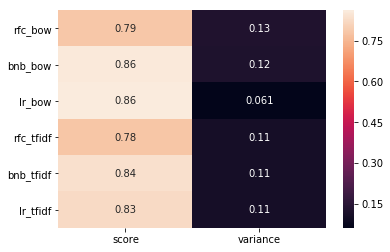

In [229]:
sns.heatmap(model_scores[['score', 'variance']], annot=True)
plt.ylabel = model_scores.index

plt.show()

Of these models, Logistic Regression on Bag of Words was tied for highest accuracy, with the lowest variance by far.

# Increase Accuracy:

(I have not yet completed this step; I wanted to check and make sure I was on the right track.)